In [1]:
import pandas as pd                                          #import libraries
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
twitter = pd.read_csv('twitter_training.csv',header=None)

In [3]:
twitter.head(3)

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...


In [4]:
twitter.shape

(74682, 4)

In [5]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       74682 non-null  int64 
 1   1       74682 non-null  object
 2   2       74682 non-null  object
 3   3       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [6]:
twitter.isnull().sum()

0      0
1      0
2      0
3    686
dtype: int64

In [7]:
twitter = twitter.dropna()

In [8]:
twitter = twitter.iloc[:,-1]   #seleting only text columns 

In [9]:
twitter

0        im getting on borderlands and i will murder yo...
1        I am coming to the borders and I will kill you...
2        im getting on borderlands and i will kill you ...
3        im coming on borderlands and i will murder you...
4        im getting on borderlands 2 and i will murder ...
                               ...                        
74677    Just realized that the Windows partition of my...
74678    Just realized that my Mac window partition is ...
74679    Just realized the windows partition of my Mac ...
74680    Just realized between the windows partition of...
74681    Just like the windows partition of my Mac is l...
Name: 3, Length: 73996, dtype: object

In [10]:
twitter = pd.Series(twitter,name="Review")

In [11]:
twitter = twitter.to_frame()

In [12]:
twitter

,Review
0,im getting on borderlands and i will murder yo...
1,I am coming to the borders and I will kill you...
2,im getting on borderlands and i will kill you ...
3,im coming on borderlands and i will murder you...
4,im getting on borderlands 2 and i will murder ...
...,...
74677,Just realized that the Windows partition of my...
74678,Just realized that my Mac window partition is ...
74679,Just realized the windows partition of my Mac ...
74680,Just realized between the windows partition of...


In [13]:
import nltk

In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [15]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to C:\Users\USER-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [16]:
sia = SentimentIntensityAnalyzer()

In [17]:
def calculate_sentiment(twitter):
    # Get the sentiment scores for the review text
    sentiment = sia.polarity_scores(twitter)
    # Return the compound score, which is a normalized score between -1 (most negative) and 1 (most positive)
    return sentiment['compound']

In [18]:
# test code
testing = "Wow! This new phone is amazing! Super fast, great battery life & an insane camera"

# Calculate sentiment
print(calculate_sentiment(testing))

0.938


In [20]:
#test
texts = [                                                                
        "Had the best meal at this restaurant! Everything was so delicious & the service was top-notch.",    #Positive  
        "Movie was okay, not as great as the trailer made it seem. Some parts were fun, but overall just average.",     #neutral
        "This update ruined the app! It keeps freezing & crashing. Fix this ASAP."  #negative
    
]

for text in texts:
    scores =sia.polarity_scores(text)
    print(f"text: {text}\nCompound Score: {scores['compound']}\n")

text: Had the best meal at this restaurant! Everything was so delicious & the service was top-notch.
Compound Score: 0.8816

text: Movie was okay, not as great as the trailer made it seem. Some parts were fun, but overall just average.
Compound Score: 0.1162

text: This update ruined the app! It keeps freezing & crashing. Fix this ASAP.
Compound Score: -0.5848



In [22]:
# Apply sentiment analysis to calculate sentiment scores for each review
twitter['SentimentScore'] = twitter['Review'].apply(calculate_sentiment)
twitter

,Review,SentimentScore
0,im getting on borderlands and i will murder yo...,-0.6908
1,I am coming to the borders and I will kill you...,-0.6908
2,im getting on borderlands and i will kill you ...,-0.6908
3,im coming on borderlands and i will murder you...,-0.6908
4,im getting on borderlands 2 and i will murder ...,-0.6908
...,...,...
74677,Just realized that the Windows partition of my...,0.0772
74678,Just realized that my Mac window partition is ...,-0.2960
74679,Just realized the windows partition of my Mac ...,-0.2960
74680,Just realized between the windows partition of...,0.0772


In [25]:
# Define a function to bucket sentiment scores into text ranges
def sentiment_bucket(score):
    if score >= 0.5:
        return '0.5 to 1.0'  # Strongly positive sentiment
    elif 0.0 <= score < 0.5:
        return '0.0 to 0.49'  # Mildly positive sentiment
    elif -0.5 <= score < 0.0:
        return '-0.49 to 0.0'  # Mildly negative sentiment
    else:
        return '-1.0 to -0.5'  # Strongly negative sentiment

In [26]:
# Apply sentiment bucketing to categorize scores into defined ranges
twitter['SentimentBucket'] = twitter['SentimentScore'].apply(sentiment_bucket)
twitter

,Review,SentimentScore,SentimentBucket
0,im getting on borderlands and i will murder yo...,-0.6908,-1.0 to -0.5
1,I am coming to the borders and I will kill you...,-0.6908,-1.0 to -0.5
2,im getting on borderlands and i will kill you ...,-0.6908,-1.0 to -0.5
3,im coming on borderlands and i will murder you...,-0.6908,-1.0 to -0.5
4,im getting on borderlands 2 and i will murder ...,-0.6908,-1.0 to -0.5
...,...,...,...
74677,Just realized that the Windows partition of my...,0.0772,0.0 to 0.49
74678,Just realized that my Mac window partition is ...,-0.2960,-0.49 to 0.0
74679,Just realized the windows partition of my Mac ...,-0.2960,-0.49 to 0.0
74680,Just realized between the windows partition of...,0.0772,0.0 to 0.49


In [27]:
twitter.to_csv("facts_reviews_with_sentiment.csv",index=False)

In [37]:
twitter['SentimentBucket'].value_counts()

SentimentBucket
0.0 to 0.49     25612
0.5 to 1.0      20997
-1.0 to -0.5    15422
-0.49 to 0.0    11965
Name: count, dtype: int64

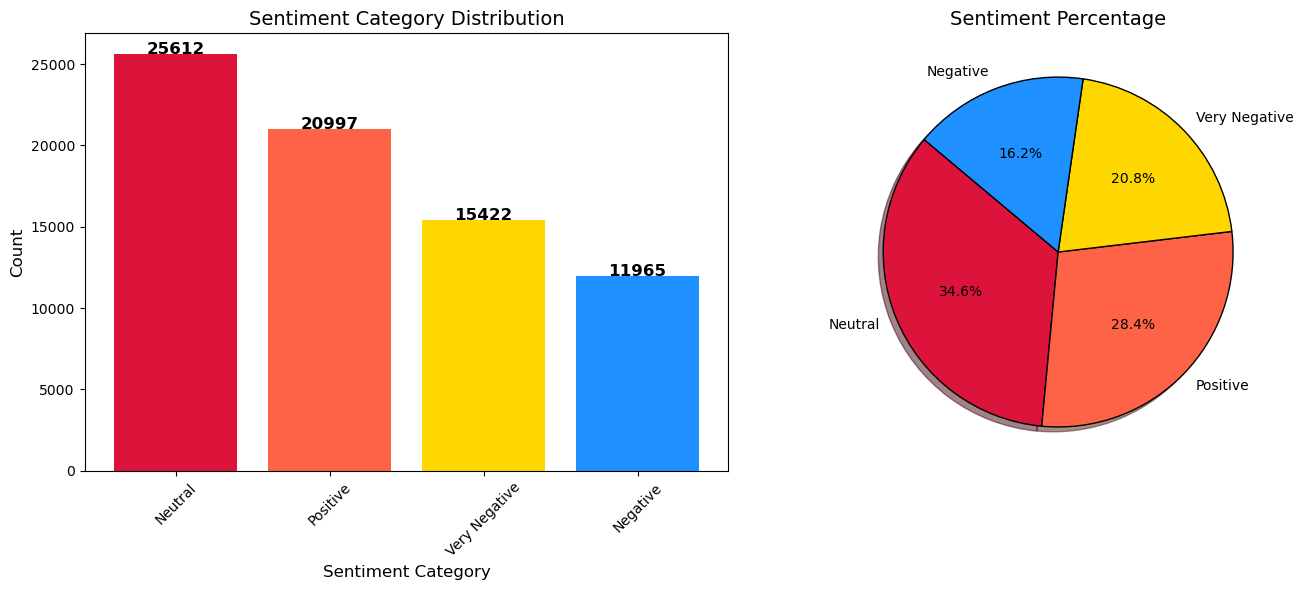

In [45]:
# Define Sentiment Labels
sentiment_map = {
    "-1.0 to -0.5": "Very Negative",
    "-0.49 to 0.0": "Negative",
    "0.0 to 0.49": "Neutral",
    "0.5 to 1.0": "Positive",
    "1.0 to 1.5": "Very Positive"
}

# Replace index labels
sentiment_counts = twitter['SentimentBucket'].value_counts()
labels = [sentiment_map.get(str(lbl), lbl) for lbl in sentiment_counts.index]
sizes = sentiment_counts.values
colors = ['crimson', 'tomato', 'gold', 'dodgerblue', 'seagreen']

# Create Subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# **Bar Chart with English Labels**
axes[0].bar(labels, sizes, color=colors)
axes[0].set_title("Sentiment Category Distribution", fontsize=14)
axes[0].set_ylabel("Count", fontsize=12)
axes[0].set_xlabel("Sentiment Category", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Add values inside bars
for bar in axes[0].containers[0]:
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, str(bar.get_height()), 
                 ha='center', fontsize=12, fontweight='bold')

# **Pie Chart with English Labels**
axes[1].pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, shadow=True, wedgeprops={'edgecolor': 'black'})
axes[1].set_title("Sentiment Percentage", fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()